In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv("D:\downloads/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
print("Cut: ",set(df["cut"]))
print("Color: ",set(df["color"]))
print("Clarity: ",set(df["clarity"]))

Cut:  {'Good', 'Premium', 'Ideal', 'Fair', 'Very Good'}
Color:  {'I', 'D', 'J', 'F', 'E', 'G', 'H'}
Clarity:  {'VS1', 'VS2', 'SI1', 'IF', 'SI2', 'VVS1', 'I1', 'VVS2'}


In [6]:
df['price/wt']=df['price']/df['carat']
print(df.groupby('cut')['price/wt'].mean().sort_values())
print(df.groupby('color')['price/wt'].mean().sort_values())
print(df.groupby('clarity')['price/wt'].mean().sort_values())
df = df.drop(['price/wt','table'], axis=1)

cut
Fair         3767.255681
Good         3860.027680
Ideal        3919.699825
Very Good    4014.128366
Premium      4222.905374
Name: price/wt, dtype: float64
color
E    3804.611475
J    3825.649192
D    3952.564280
I    3996.402051
H    4008.026941
F    4134.730684
G    4163.411524
Name: price/wt, dtype: float64
clarity
I1      2796.296437
SI1     3849.078018
VVS1    3851.410558
SI2     4010.853865
VS2     4080.526787
VS1     4155.816808
VVS2    4204.166013
IF      4259.931736
Name: price/wt, dtype: float64


In [8]:
df.corr()

,Unnamed: 0,carat,cut,color,clarity,depth,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.089075,-0.098281,-0.196176,-0.034800,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.165288,0.289789,0.321050,0.028224,0.921591,0.975094,0.951722,0.953387
cut,-0.089075,0.165288,1.000000,0.038791,0.163675,-0.087780,0.112423,0.169897,0.152394,0.148141
color,-0.098281,0.289789,0.038791,1.000000,-0.021775,0.049213,0.174458,0.269458,0.262518,0.267210
clarity,-0.196176,0.321050,0.163675,-0.021775,1.000000,0.047461,0.147521,0.344053,0.332269,0.338033
depth,-0.034800,0.028224,-0.087780,0.049213,0.047461,1.000000,-0.010647,-0.025289,-0.029341,0.094924
price,-0.306873,0.921591,0.112423,0.174458,0.147521,-0.010647,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,0.169897,0.269458,0.344053,-0.025289,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,0.152394,0.262518,0.332269,-0.029341,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.148141,0.267210,0.338033,0.094924,0.861249,0.970772,0.952006,1.000000


In [7]:
df['cut']=df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['color']=df['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity']=df['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})


In [9]:
df['cut/wt']=df['cut']/df['carat']
df['color/wt']=df['color']/df['carat']
df['clarity/wt']=df['clarity']/df['carat']
df = df.drop(['cut','color','clarity','depth'], axis=1)



In [10]:
X=df.drop(['price'],axis=1)
Y=df['price']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [11]:
#Using Linear Regression Model
from sklearn import linear_model
reg_all=linear_model.LinearRegression()
reg_all.fit(X_train,Y_train)
y_pred=reg_all.predict(X_test)
Rsquare=reg_all.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Variable']
coeff_df["Coeff"] = pd.Series(reg_all.coef_)
coeff_df.sort_values(by='Coeff', ascending=True)
print(coeff_df)
print("Intercept: %f" %(reg_all.intercept_))
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))

Rsquare: 0.860582
     Variable         Coeff
0  Unnamed: 0      0.007432
1       carat  10672.980027
2           x  -1304.629819
3           y     99.977662
4           z   -473.435335
5      cut/wt      8.118432
6    color/wt    -44.732848
7  clarity/wt    -62.860238
Intercept: 4581.738500
mae: 912.332157
rmse: 1474.570522


In [12]:
#Polynomial Regression Degree 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train,Y_train)
y_pred=reg_all.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))
Rsquare=reg_all.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))

mae: 497.409481
Rsquare: 0.947920
rmse: 901.244498


In [ ]:
#Polynomial Regression Degree 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train,Y_train)
y_pred=reg_all.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))
Rsquare=reg_all.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))

In [13]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))

mae: 5.752565
Rsquare: 0.996853
rmse: 221.537974


In [ ]:
#Using Support Vector Regression
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))

In [ ]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train,Y_train) 
y_pred=logreg.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))
Rsquare=logreg.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))

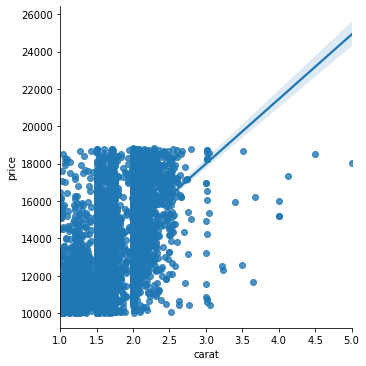

In [15]:
#Best Fit Line 
sns.lmplot(x = "carat", y = "price", data = df.query("price >= 10000"))

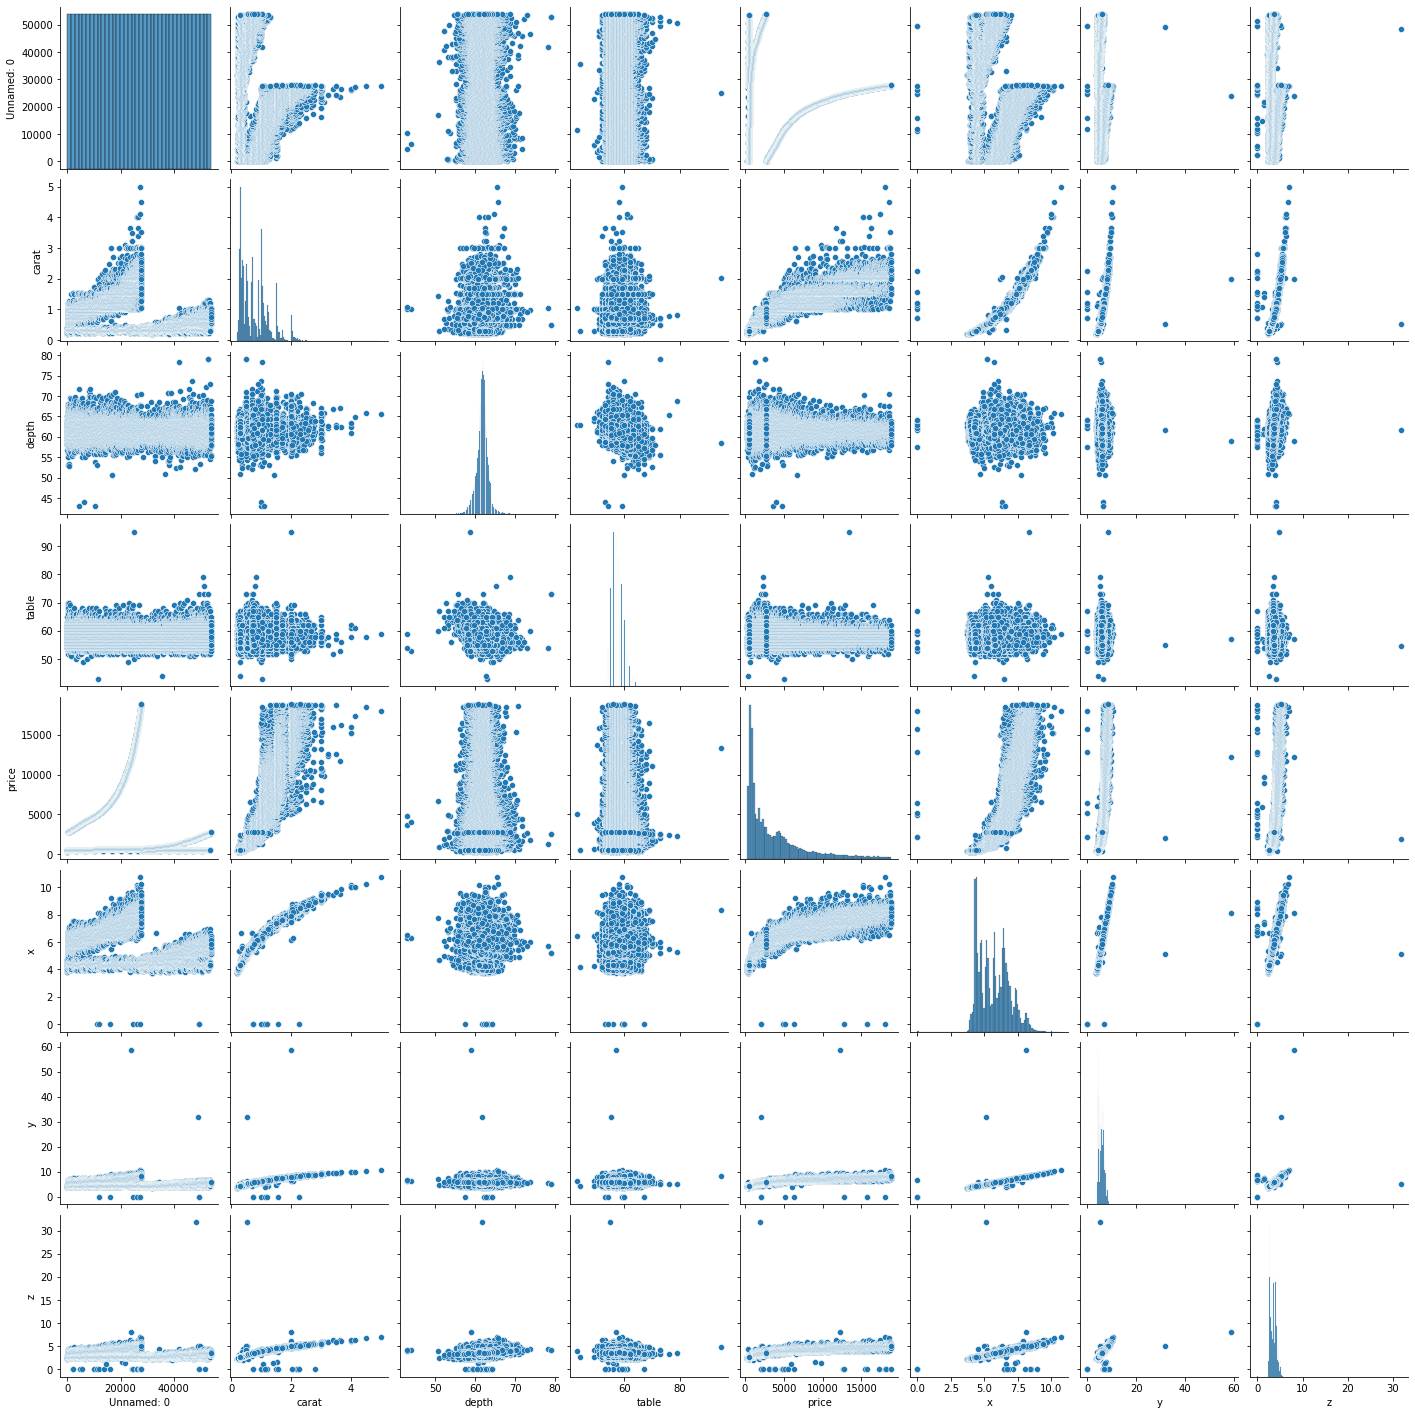

In [5]:
#Different Visualisations
sns.pairplot(df)

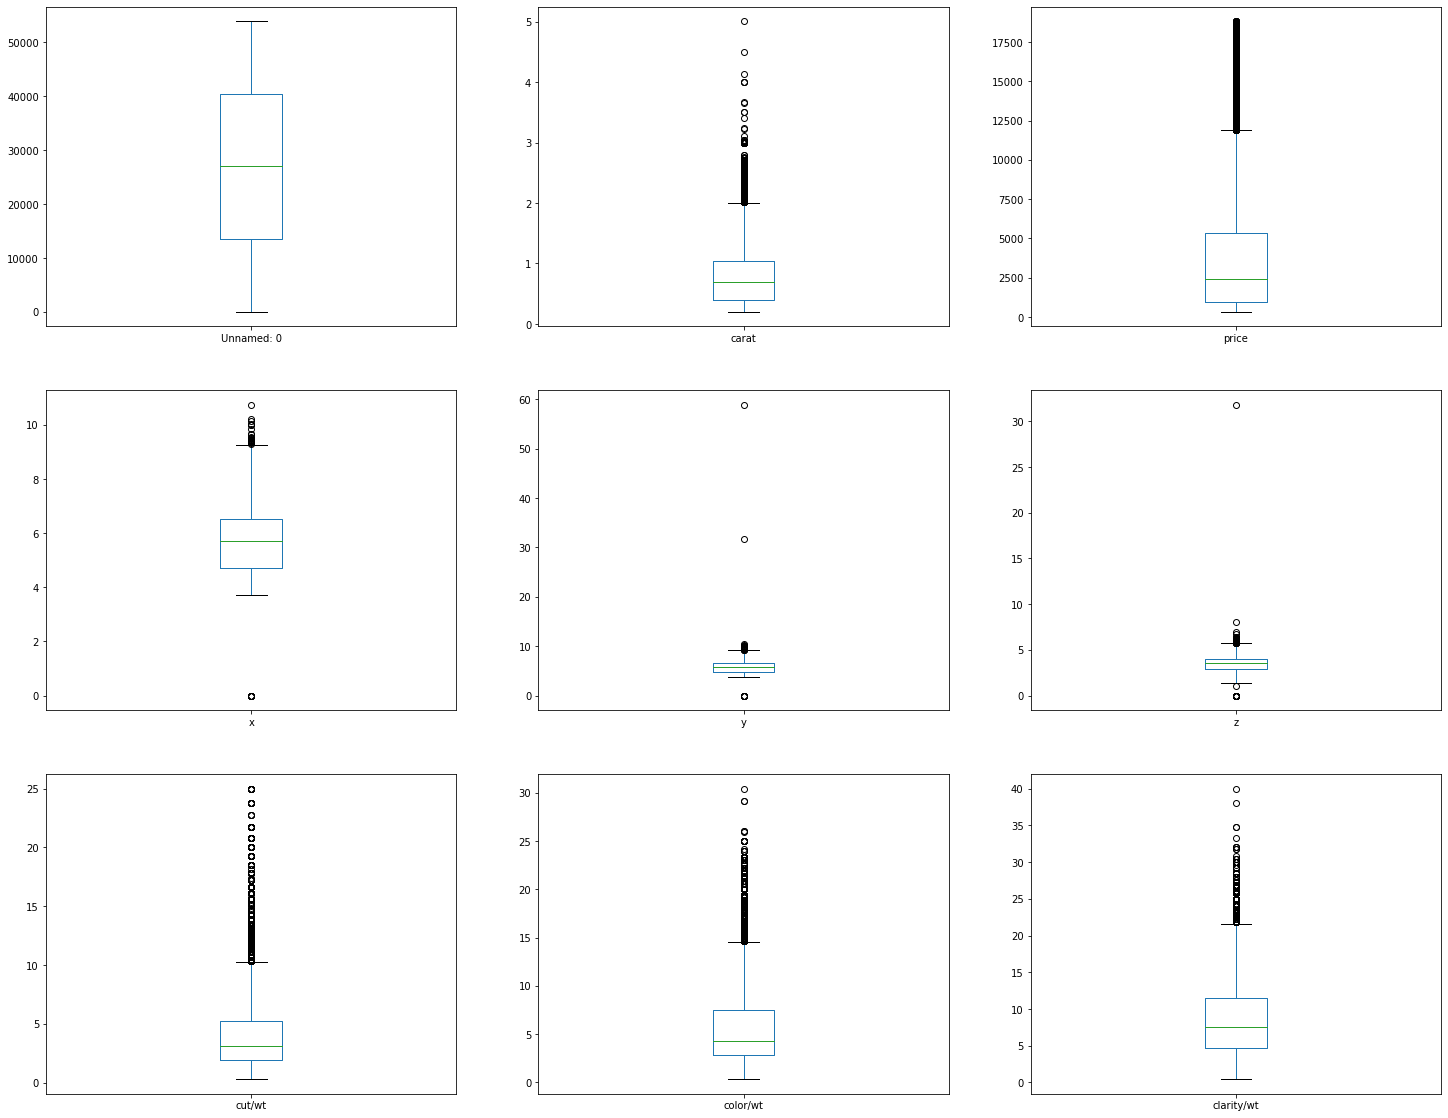

In [28]:
df.plot(kind='box',figsize=(25,20),subplots=True,layout=(3,3))
plt.show()